# Descrizione del problema
Il nostro obiettivo è quello di creare un modello di regressione in grado di predire la quantità di grano prodotto da un determinato paese, conoscendo i seguenti fattori, ambientiali e non:
- Paese.
- Quantità media di pioggia caduta.
- Temperatura.
- Quantità di pesticidi utilizzati.
- Popolazione del paese.

Cercando online, siamo riusciti a trovare i dataset necessari. I dataset sono stati presi dal sito online della FAO(Food and Agricolture Organization of the United Nations) e dal sito delle Nazioni Unite.

# Descrizione dei dati
I dataset sono 4:
- `yield`, che contiene i dati relativi alla quantità raccolta di diversi frumenti, tra cui il grano.
- `rainfall`, che contiene i dati relativi alla pioggia.
- `temp`, che contiene i dati relativi alla temperatura.
- `pesticides`, che contiene i dati relativi ai pesticidi.
- `population`, che contiene i dati relativi alla popolazione.

Importiamo le librerie necessarie:

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Rain

In [87]:
rain = pd.read_csv('rainfall.csv')
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [88]:
rain.shape

(6727, 3)

In [89]:
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


Come possiamo vedere, il dataset `rain` ha 3 feature:
- `Area`, che contiene il nome dello stato.
- `Year`, che indica l'anno in cui sono stati raccolti i dati.
- `average_rain_fall_mm_per_year`, che indica la quantità media di pioggia caduta in millimetri, in un determinato anno e in un determinato paese.

Inoltre, le feature `Area` e `average_rain_fall_mm_per_year` vengono memorizzate come `object`. Questo succede poichè nel leggere i dati, Pandas converte di deafult in object tutti i tipi che non sono interi.Dunque, cambiamo il tipo di `Area` in `String`, ed il tipo di `average_rain_fall_mm_per_year` in `Float`.

In [90]:
rain.describe()

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


Notiamo che il dataset, per ogni `Area`, contiene dati dal 1985 al 2017.

In [91]:
rain['average_rain_fall_mm_per_year'] = pd.to_numeric(rain['average_rain_fall_mm_per_year'],errors = 'coerce')
rain[' Area'] = rain[' Area'].astype(pd.StringDtype())
rain.rename(columns={' Area': 'Area'}, inplace=True)
rain.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   string 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 157.8 KB


Oltre ad una migliore rappresentazione dei dati, otteniamo anche una dimensione fissa del file di 157.8 KB.

In [92]:
print(f"Numero totale di paesi: {rain['Area'].unique().size}")

Numero totale di paesi: 217


Il dataset contiene 217 paesi in totale.

In [93]:
rain.dropna()
rain.shape

(6727, 3)

Chiamando il metodo `dropna` togliamo tutte le righe contenenti valori null. Osserviamo però che la shape del data frame non è cambiato, quindi non erano presenti righe con valori null.

### Pesticides

In [94]:
pest = pd.read_csv('pesticides.csv')
pest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


In [95]:
pest.shape

(4349, 7)

In [96]:
pest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


Il dataset contiene le seguenti features:
- `Domain`, dominio dei dati raccolti. Il dominio sarà lo stesso per tutte le istanze del dataset.
- `Item`, tipologia di prodotto utilizzato. Nel nostro caso sono solo pesticicidi.
- `Area`, nome del paese in questione,
- `Year`, anno in cui sono state raccolte tali informazioni.
- `Unit`, unità di misura(in questo caso tonnellate).
- `Value`, quantità di pesticidi usati in un determinato anno in un determinato paese.

Le feature `Domain`, `Element`, `Item` e `Unit` sono inutili per il nostro modello, perciò le rimuoviamo. Inoltre cambiamo il nome della colonna `Value` in `Value_in_t` per indicare l'unità di misura e rimuoviamo le eventuali righe contenenti valori null.

In [97]:
pest['Area'] = pest['Area'].astype(pd.StringDtype())

In [98]:
pest.dropna()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
...,...,...,...,...,...,...,...
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07


In [99]:
pest.drop(['Domain', 'Item', 'Unit', 'Element'], axis = 1, inplace= True)
pest.rename(columns = {'Value':'pesticides_in_t'}, inplace=True)
pest.head()

,Area,Year,pesticides_in_t
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [100]:
pest.describe()

,Year,pesticides_in_t
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


Come possiamo notare, il dataset contiene dati dal 1990 al 2016.

In [101]:
pest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             4349 non-null   string 
 1   Year             4349 non-null   int64  
 2   pesticides_in_t  4349 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 102.1 KB


In [102]:
pest.shape

(4349, 3)

Eseguendo le operazioni precedenti, siamo riusciti a ridurre la dimensione totale del dataset a 102.1 KB. Il numero di righe non è cambiato dopo aver chiamato il metodo `dropna`, perciò non erano presenti righe con valori null.

In [103]:
print(f"Numero totale di paesi: {pest['Area'].unique().size}")

Numero totale di paesi: 168


Vediamo che il numero di paesi di questo dataset è minore rispetto al dataest `rain`. Dunque, per poter procedere verso il merging dei vari dataset per creare uno solo, bisogna rimuovere da `rain` tutte le righe rigurdanti i paesi non contenuti in `pesticides`.

### Temperature

In [104]:
temp_data = pd.read_csv('temp.csv')
temp_data.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [105]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


La colonna "country" è composta da oggetti, per risparmiare della memoria e rendere più facile il suo utilizzo, tutti i valori vengono trasformati in stringhe

In [106]:
temp_data['country'] = temp_data['country'].astype('string')

In [107]:
temp_data.isna().sum()

year           0
country        0
avg_temp    2547
dtype: int64

Come si può osservare in molte righe della tabella sono presenti valo `NaN`, è opportuno quindi eliminare queste istanze

In [108]:
temp_data = temp_data.dropna()

In [109]:
temp_data[temp_data['country']=='Albania']

,year,country,avg_temp
64138,1743,Albania,12.69
64139,1744,Albania,16.73
64140,1745,Albania,9.11
64145,1750,Albania,15.91
64146,1751,Albania,16.23
...,...,...,...
64404,2009,Albania,16.73
64405,2010,Albania,16.52
64406,2011,Albania,16.45
64407,2012,Albania,16.70


In [110]:
temp_data[(temp_data['country']=='Russia') & (temp_data['year']==1990)]

,year,country,avg_temp
14889,1990,Russia,3.77
31683,1990,Russia,5.00
43772,1990,Russia,5.81
47112,1990,Russia,1.84
47981,1990,Russia,2.37
49827,1990,Russia,2.62
56606,1990,Russia,5.05
66063,1990,Russia,3.45
68622,1990,Russia,9.10


In alcuni casi, data la grandezza degli stati sono presenti più valori per coppia Stato-Anno, quindi è necessario tenere un solo valore per coppia. Per fare ciò calcolo media di tutte le temperature per ogni coppia Stato-Anno.

In [111]:
temp_data = temp_data.groupby(['year', 'country'], as_index=False).mean()
temp_data['avg_temp'] = temp_data['avg_temp'].round(2)

In [112]:
temp_data[(temp_data['country']=='Russia') & (temp_data['year']==1990)]

,year,country,avg_temp
24292,1990,Russia,4.33


In [113]:
temp_data.describe()

,year,avg_temp
count,27479.000000,27479.00000
mean,1907.047891,16.23145
std,67.873286,7.95306
min,1743.000000,-12.13000
25%,1860.000000,9.08000
50%,1913.000000,16.25000
75%,1963.000000,24.49000
max,2013.000000,30.42000


In [114]:
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].min()])
print(temp_data[temp_data['avg_temp'] == temp_data['avg_temp'].max()])

      year     country  avg_temp
3151  1815  Kazakhstan    -12.13
       year country  avg_temp
27432  2013   Niger     30.42


Come si può osservare dalla tabella sopra la temperatura minima registrata nel dataset è di -12.13C in Kazakhstan nel 1815 mentre quella massima è di 30.42C in Niger nel 2013

In [115]:
temp_year_list = temp_data['year'].unique()
temp_country_list = temp_data['country'].unique()
temp_year_list.sort()

In [116]:
temp_avg_temp_per_year = {}
for i in temp_year_list:
    temp = temp_data[temp_data['year']==i]['avg_temp'].mean()
    temp_avg_temp_per_year[i] = temp

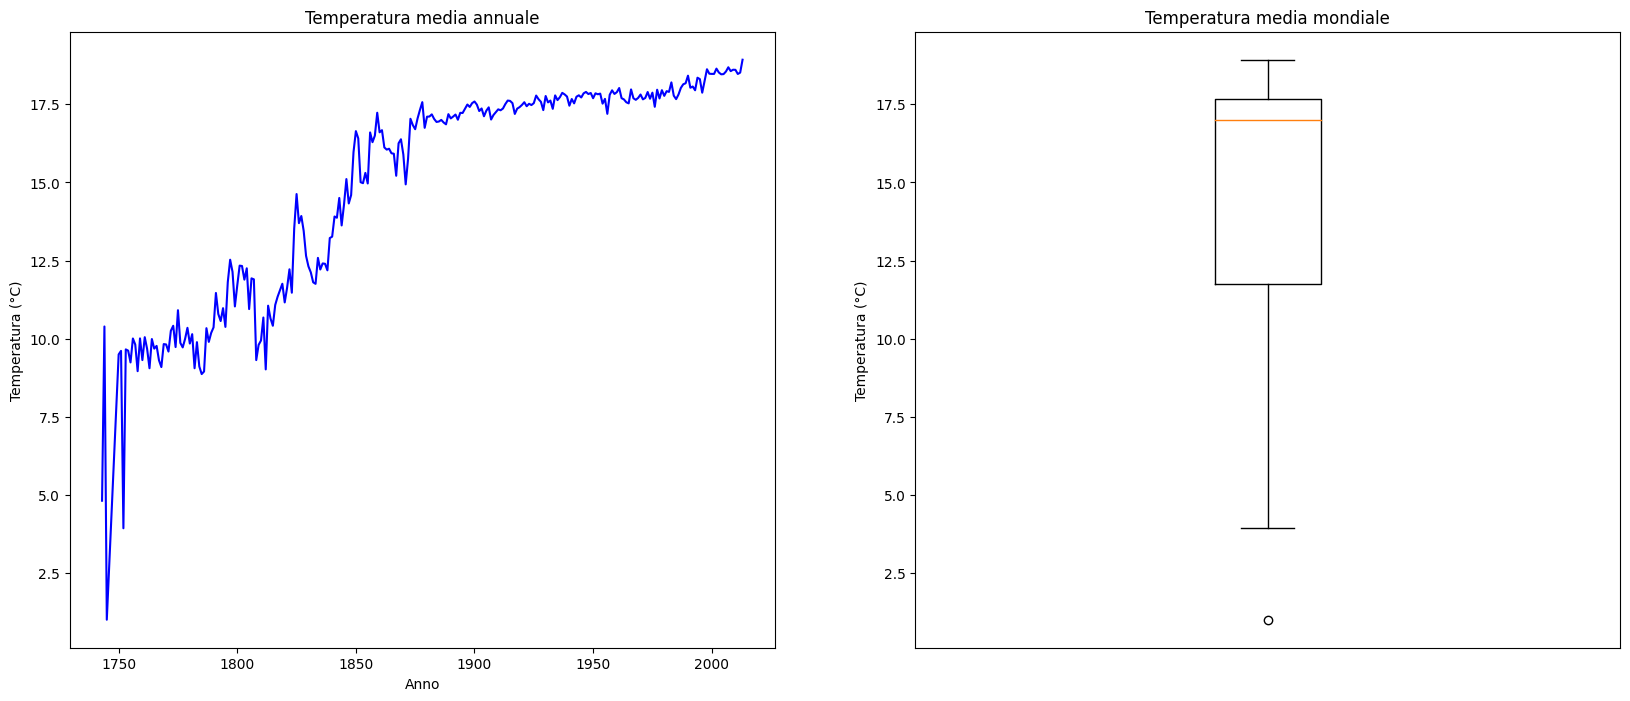

In [117]:
temp_year, temp_avg = zip(*temp_avg_temp_per_year.items())
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1.plot(temp_year, temp_avg, color='b', linestyle='-')
ax1.set_title('Temperatura media annuale')
ax1.set_xlabel('Anno')
ax1.set_ylabel('Temperatura (°C)')

ax2.set_title('Temperatura media mondiale')
ax2.boxplot(temp_avg)
ax2.set_ylabel('Temperatura (°C)')
ax2.xaxis.set_visible(False)

plt.show()

### Yield

In [118]:
yield_data = pd.read_csv('yield.csv')
yield_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [119]:
yield_data.isna().sum()

Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64

In [120]:
yield_data.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


Dalla tabella si può osservare che sono presenti stati che non hanno prodotto grano in un determinato anno

Alcune colonne sono ripetitive o non utili ai fini dello studio quindi decido di eliminarle

In [121]:
yield_data = yield_data.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item Code', 'Element Code', 'Element', 'Unit', 'Area Code'])

Per il nostro studio è necessario sapere solo la produzione di grano e non di tutti i prodotti del dataset, quindi elimino le righe non utili.

In [122]:
yield_data.drop(yield_data[yield_data['Item'] != 'Wheat'].index, axis=0, inplace=True)
yield_data

,Area,Item,Year,Value
168,Afghanistan,Wheat,1961,10220
169,Afghanistan,Wheat,1962,9735
170,Afghanistan,Wheat,1963,8317
171,Afghanistan,Wheat,1964,9510
172,Afghanistan,Wheat,1965,9723
...,...,...,...,...
56712,Zimbabwe,Wheat,2012,24420
56713,Zimbabwe,Wheat,2013,22888
56714,Zimbabwe,Wheat,2014,21357
56715,Zimbabwe,Wheat,2015,19826


Visto che tutte le istanze sono relative al grano, possiamo rimuovere la colonna `Item` poiché ridondante.

In [123]:
yield_data = yield_data.drop('Item', axis = 1)
yield_data['Area'] = yield_data['Area'].astype(pd.StringDtype())
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6160 entries, 168 to 56716
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    6160 non-null   string
 1   Year    6160 non-null   int64 
 2   Value   6160 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 192.5 KB


Inoltre, cambiamo il nome della feature `Value` in `value_in_hg/ha` per indicare l'unità di misura.

In [124]:
yield_data.rename(columns = {'Value':'yield_in_hg/ha'}, inplace = True)
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6160 entries, 168 to 56716
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area            6160 non-null   string
 1   Year            6160 non-null   int64 
 2   yield_in_hg/ha  6160 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 192.5 KB


Per rendere i valori della produzione più semplici da utilizzare cambi l'unità di misura da ettogrammi per ettaro a tonnellate per ettaro

In [125]:
def convert_in_tons(x):
    return round(x/10000, 2)

In [126]:
yield_data['yield_in_hg/ha'] = yield_data['yield_in_hg/ha'].apply(convert_in_tons)
yield_data.rename(columns = {'yield_in_hg/ha': 'yield_in_t/ha'}, inplace = True)

In [127]:
yield_data.head()

,Area,Year,yield_in_t/ha
168,Afghanistan,1961,1.02
169,Afghanistan,1962,0.97
170,Afghanistan,1963,0.83
171,Afghanistan,1964,0.95
172,Afghanistan,1965,0.97


Creo un grafico che rappresenta i 10 paesi con la produzione media in tutto il dataset maggiore

In [128]:
yield_country_list = yield_data['Area'].unique()
avg_wheat_production_per_country = {}
for i in yield_country_list:
    avg_wheat_production_per_country[i] = yield_data[yield_data['Area']==i]['yield_in_t/ha'].mean()

In [129]:
avg_wheat_production_per_country = sorted(avg_wheat_production_per_country.items(), key=lambda kv: kv[1], reverse=True)
avg_wheat_production_per_country = avg_wheat_production_per_country[:10]

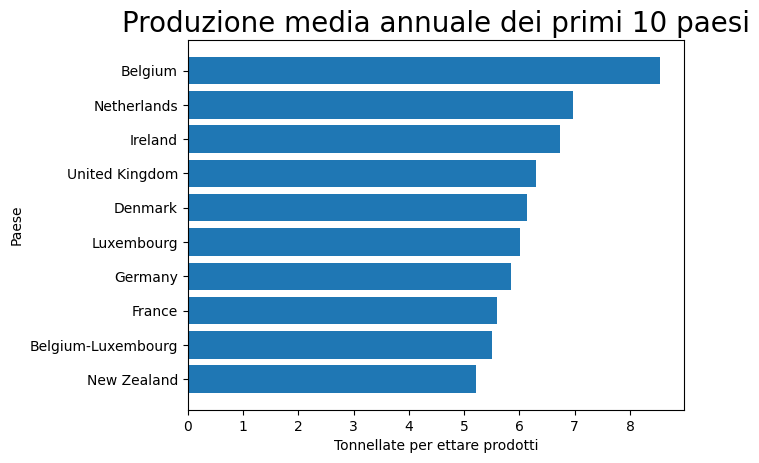

In [130]:
area, value = zip(*avg_wheat_production_per_country)
fig, ax = plt.subplots()
ax.set_title('Produzione media annuale dei primi 10 paesi', fontsize=20)
ax.barh(area, value)
ax.invert_yaxis()
ax.set_xlabel('Tonnellate per ettare prodotti')
ax.set_ylabel('Paese')
plt.show()

Nel seguente grafico rappresentiamo invece la media mondiale di produzione di grano per ogni anno

In [131]:
avg_production_per_year_dict = {}
yield_year_list = yield_data['Year'].unique()
yield_year_list.sort()
for i in yield_year_list:
    avg_production_per_year_dict[i] = yield_data[yield_data['Year']==i]['yield_in_t/ha'].mean()

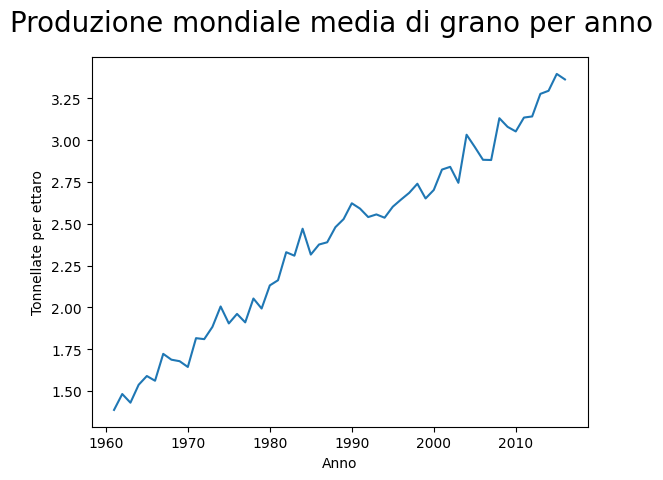

In [132]:
years, prod = zip(*avg_production_per_year_dict.items())
plt.figure()
plt.suptitle('Produzione mondiale media di grano per anno', fontsize=20)
plt.xlabel('Anno')
plt.ylabel('Tonnellate per ettaro')
plt.plot(years, prod)
plt.show()

### Population dataset

In [133]:
population_table = pd.read_csv('population.csv')
population_table.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,580.7496,498.0396,240.3164,271.6253,208.1916,378.6968,430.2594,324.9308,0.0,0.0
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,566.7283,490.1993,231.1772,258.0905,203.7797,368.3186,415.8362,319.3364,0.0,0.0
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,546.3173,477.2639,218.6745,240.0344,197.1422,353.0546,395.5327,309.9103,0.0,0.0
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,535.8289,469.5325,212.8720,232.6019,193.0492,345.0826,385.8433,303.9053,0.0,0.0
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,...,523.1236,458.4842,205.7622,224.0498,187.4439,335.4420,374.6576,295.9944,0.0,0.0


In [134]:
population_table.rename(columns={'TPopulation1Jan':'Total population (k)'}, inplace=True)

Molte colonne presenti nel dataset non sono utili, posso quindi eliminarle dalla tabella

In [135]:
population_table = population_table.drop(columns=['SortOrder', 'LocID', 'Notes', 'ISO3_code', 'ISO2_code', 'SDMX_code',
       'LocTypeID', 'LocTypeName', 'ParentID', 'VarID', 'Variant', 'TPopulationMale1July', 'TPopulationFemale1July', 'PopDensity', 'PopSexRatio', 'MedianAgePop',
       'NatChange', 'NatChangeRT', 'PopChange', 'PopGrowthRate', 'TPopulation1July',
       'DoublingTime', 'Births', 'Births1519', 'CBR', 'TFR', 'NRR', 'MAC',
       'SRB', 'Deaths', 'DeathsMale', 'DeathsFemale', 'CDR', 'LEx', 'LExMale',
       'LExFemale', 'LE15', 'LE15Male', 'LE15Female', 'LE65', 'LE65Male',
       'LE65Female', 'LE80', 'LE80Male', 'LE80Female', 'InfantDeaths', 'IMR',
       'LBsurvivingAge1', 'Under5Deaths', 'Q5', 'Q0040', 'Q0040Male',
       'Q0040Female', 'Q0060', 'Q0060Male', 'Q0060Female', 'Q1550',
       'Q1550Male', 'Q1550Female', 'Q1560', 'Q1560Male', 'Q1560Female',
       'NetMigrations', 'CNMR'])

In [136]:
population_table

,Location,Time,Total population (k)
0,World,1950,2477674.732
1,World,1951,2520969.582
2,World,1952,2565291.179
3,World,1953,2615250.618
4,World,1954,2665306.975
...,...,...,...
43467,Wallis and Futuna Islands,2097,10.063
43468,Wallis and Futuna Islands,2098,10.009
43469,Wallis and Futuna Islands,2099,9.969
43470,Wallis and Futuna Islands,2100,9.911


In [137]:
population_table.isna().sum()

Location                0
Time                    0
Total population (k)    0
dtype: int64

In [138]:
population_table['Time'].max()

2101

In questo dataset sono presenti delle predizioni del numero della popolazione fino al 2101, dato che non sono necessarie posso eliminarle tenendo nel dataset solo i dati fino all'anno 2013 (anno fino al quale possediamo i dati).

In [139]:
population_table = population_table.drop(population_table[population_table['Time']>2013].index)
population_table['Time'].max()

2013

In [140]:
def plotPopulation(location):
    plt.figure(figsize=(12, 5))
    location_df = population_table[population_table['Location']==location]
    location_df = location_df.drop(columns=['Location'])
    location_df = location_df.set_index('Time')
    plt.suptitle(f'Popolazione in {location}')
    plt.xlabel('Anni')
    plt.ylabel('Migliaia di abitanti')
    plt.plot(location_df, 'o-')
    plt.grid()
    plt.show()

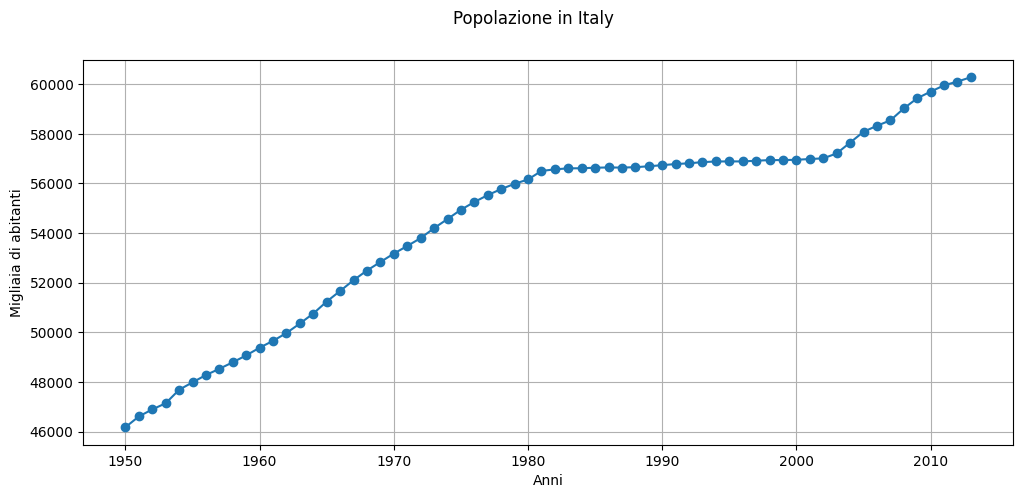

In [141]:
plotPopulation('Italy')

Come si può vedere dal grafico la popolazione mondiale è in crescita, si suppone quindi che ci sarà una domanda maggiore di grano di conseguenza una produzione maggiore

### Merge dei dataset

Ora non ci resta che unire tutti i dataset in un unico dataset `data`, che utilizzeremo per allenare i nostri modelli:

In [142]:
population_table.rename(columns = {'Location':'Area'}, inplace = True)
population_table.rename(columns = {'Time':'Year'}, inplace = True)
temp_data.rename(columns = {'country':'Area'}, inplace = True)
temp_data.rename(columns = {'year':'Year'}, inplace = True)
temp_yield_data = pd.merge(temp_data, yield_data, on=['Year','Area'])
pest_rain_data = pd.merge(rain,pest, on=['Year','Area'])
data = pd.merge(temp_yield_data, pd.merge(pest_rain_data, population_table, on=['Year', 'Area']),  on=['Year','Area'])


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1787 non-null   int64  
 1   Area                           1787 non-null   object 
 2   avg_temp                       1787 non-null   float64
 3   yield_in_t/ha                  1787 non-null   float64
 4   average_rain_fall_mm_per_year  1787 non-null   float64
 5   pesticides_in_t                1787 non-null   float64
 6   Total population (k)           1787 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 97.9+ KB


In [144]:
data.head()

,Year,Area,avg_temp,yield_in_t/ha,average_rain_fall_mm_per_year,pesticides_in_t,Total population (k)
0,1990,Albania,16.37,3.02,1485.0,121.00,3290.062
1,1990,Algeria,17.48,0.63,89.0,1828.92,25209.467
2,1990,Angola,24.12,0.80,1010.0,64.00,11631.523
3,1990,Argentina,17.57,1.89,591.0,26156.00,32402.162
4,1990,Australia,16.44,1.63,534.0,17866.00,16928.886


In [145]:
data.shape

(1787, 7)

In [146]:
data['Area'].unique().size

81

Vediamo che, dopo il merge, ci restano i dati realtivi soltanto a 81 stati. Questo è dovuto al fatto che alcuni stati non sono presenti in certi dataset. Di seguito, anche la lista degli stati presenti nel dataset finale ottenuto:

In [147]:
data['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Bangladesh', 'Botswana', 'Brazil', 'Bulgaria',
       'Burundi', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Denmark',
       'Ecuador', 'Egypt', 'Finland', 'France', 'Germany', 'Greece',
       'Guatemala', 'Honduras', 'Hungary', 'India', 'Iraq', 'Ireland',
       'Italy', 'Japan', 'Kenya', 'Lebanon', 'Lesotho', 'Libya',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mexico', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Niger', 'Norway', 'Pakistan', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Tunisia', 'Uganda',
       'United Kingdom', 'Uruguay', 'Zambia', 'Zimbabwe', 'Armenia',
       'Azerbaijan', 'Belarus', 'Croatia', 'Estonia', 'Kazakhstan',
       'Latvia', 'Lithuania', 'Slovenia', 'Tajikistan', 'Ukraine',
       'Eritrea', 'Belgium', 'Mo

In [148]:
data['yield_in_t/ha'].describe()

count    1787.000000
mean        3.088982
std         2.077765
min         0.170000
25%         1.570000
50%         2.440000
75%         4.150000
max         9.940000
Name: yield_in_t/ha, dtype: float64

Di seguito creiamo una funzione `show_data_of_country` che mostra i dati (yield, pioggia, temperatura, pesticidi e popolazione) di un paese specifico. L'obiettivo è quello di capire se ci sia qualche correlazione tra le feature.

In [149]:
def show_data_of_country(data, country):
    data_of_country = data[data["Area"] == country]
    years = data_of_country['Year']
    rain = data_of_country['average_rain_fall_mm_per_year']
    temp = data_of_country['avg_temp']
    _yield = data_of_country['yield_in_t/ha']
    pest = data_of_country['pesticides_in_t']
    population = data_of_country['Total population (k)']
    
     # Create a figure and axes with 3x2 subplots (the last subplot will be empty)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    
    # First subplot: Rainfall
    axes[0, 0].plot(years, rain, marker='o', linestyle='-', color='b')
    axes[0, 0].set_title(f"Average Rainfall of {country}")
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Average Rainfall (mm)')
    axes[0, 0].grid(True)

    # Second subplot: Temperature
    axes[0, 1].plot(years, temp, marker='o', linestyle='-', color='r')
    axes[0, 1].set_title(f"Average Temperature of {country}")
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Temperature (°C)')
    axes[0, 1].grid(True)

    # Third subplot: Yield
    axes[1, 0].plot(years, _yield, marker='o', linestyle='-', color='g')
    axes[1, 0].set_title(f"Crop Yield of {country}")
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Yield (hg/ha)')
    axes[1, 0].grid(True)

    # Fourth subplot: Pesticides
    axes[1, 1].plot(years, pest, marker='o', linestyle='-', color='m')
    axes[1, 1].set_title(f"Pesticides Usage of {country}")
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Pesticides (t)')
    axes[1, 1].grid(True)

    # Fifth subplot: Population
    axes[2, 0].plot(years, population, marker='o', linestyle='-', color='c')
    axes[2, 0].set_title(f"Population of {country}")
    axes[2, 0].set_xlabel('Year')
    axes[2, 0].set_ylabel('Total Population(in thousands)')
    axes[2, 0].grid(True)
    
    # Remove the empty subplot (axes[2, 1])
    fig.delaxes(axes[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    

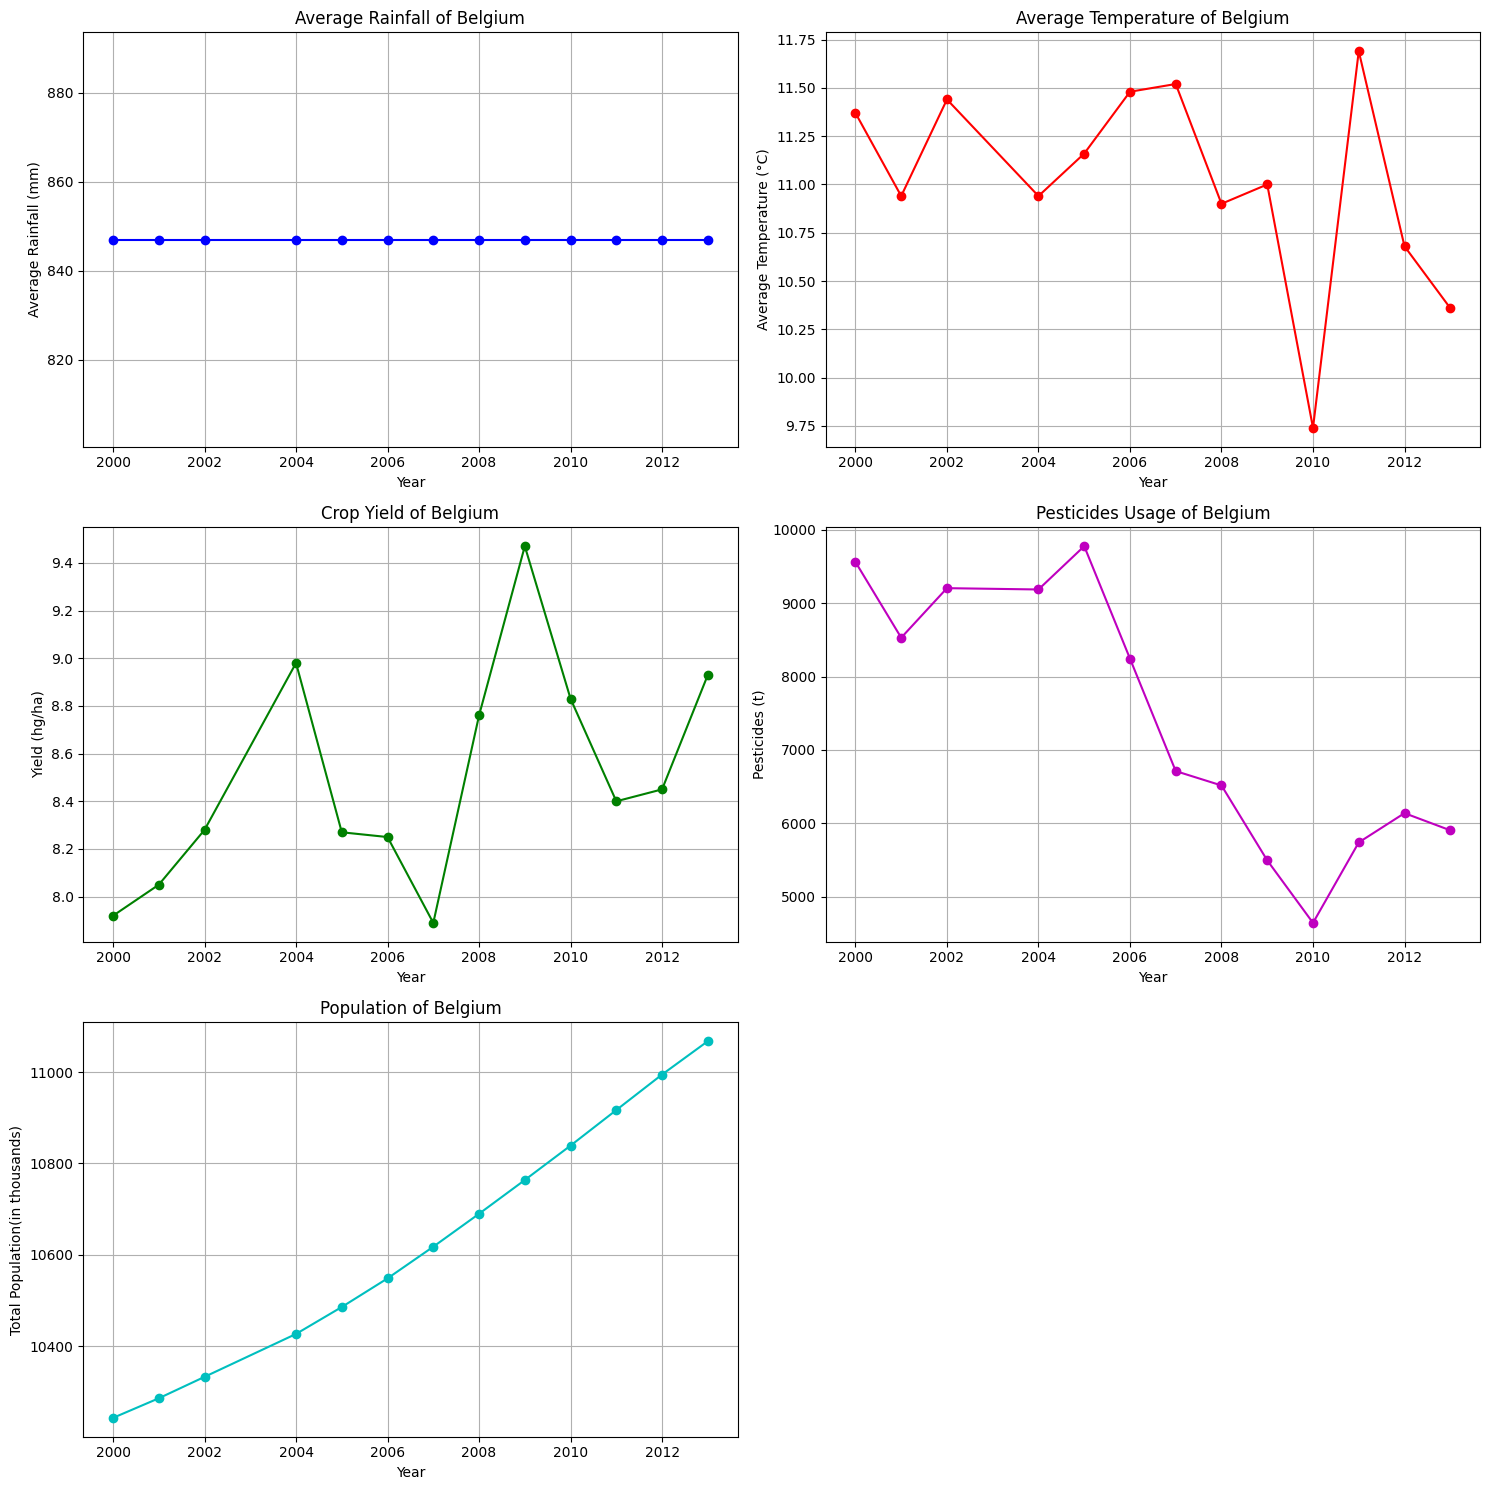

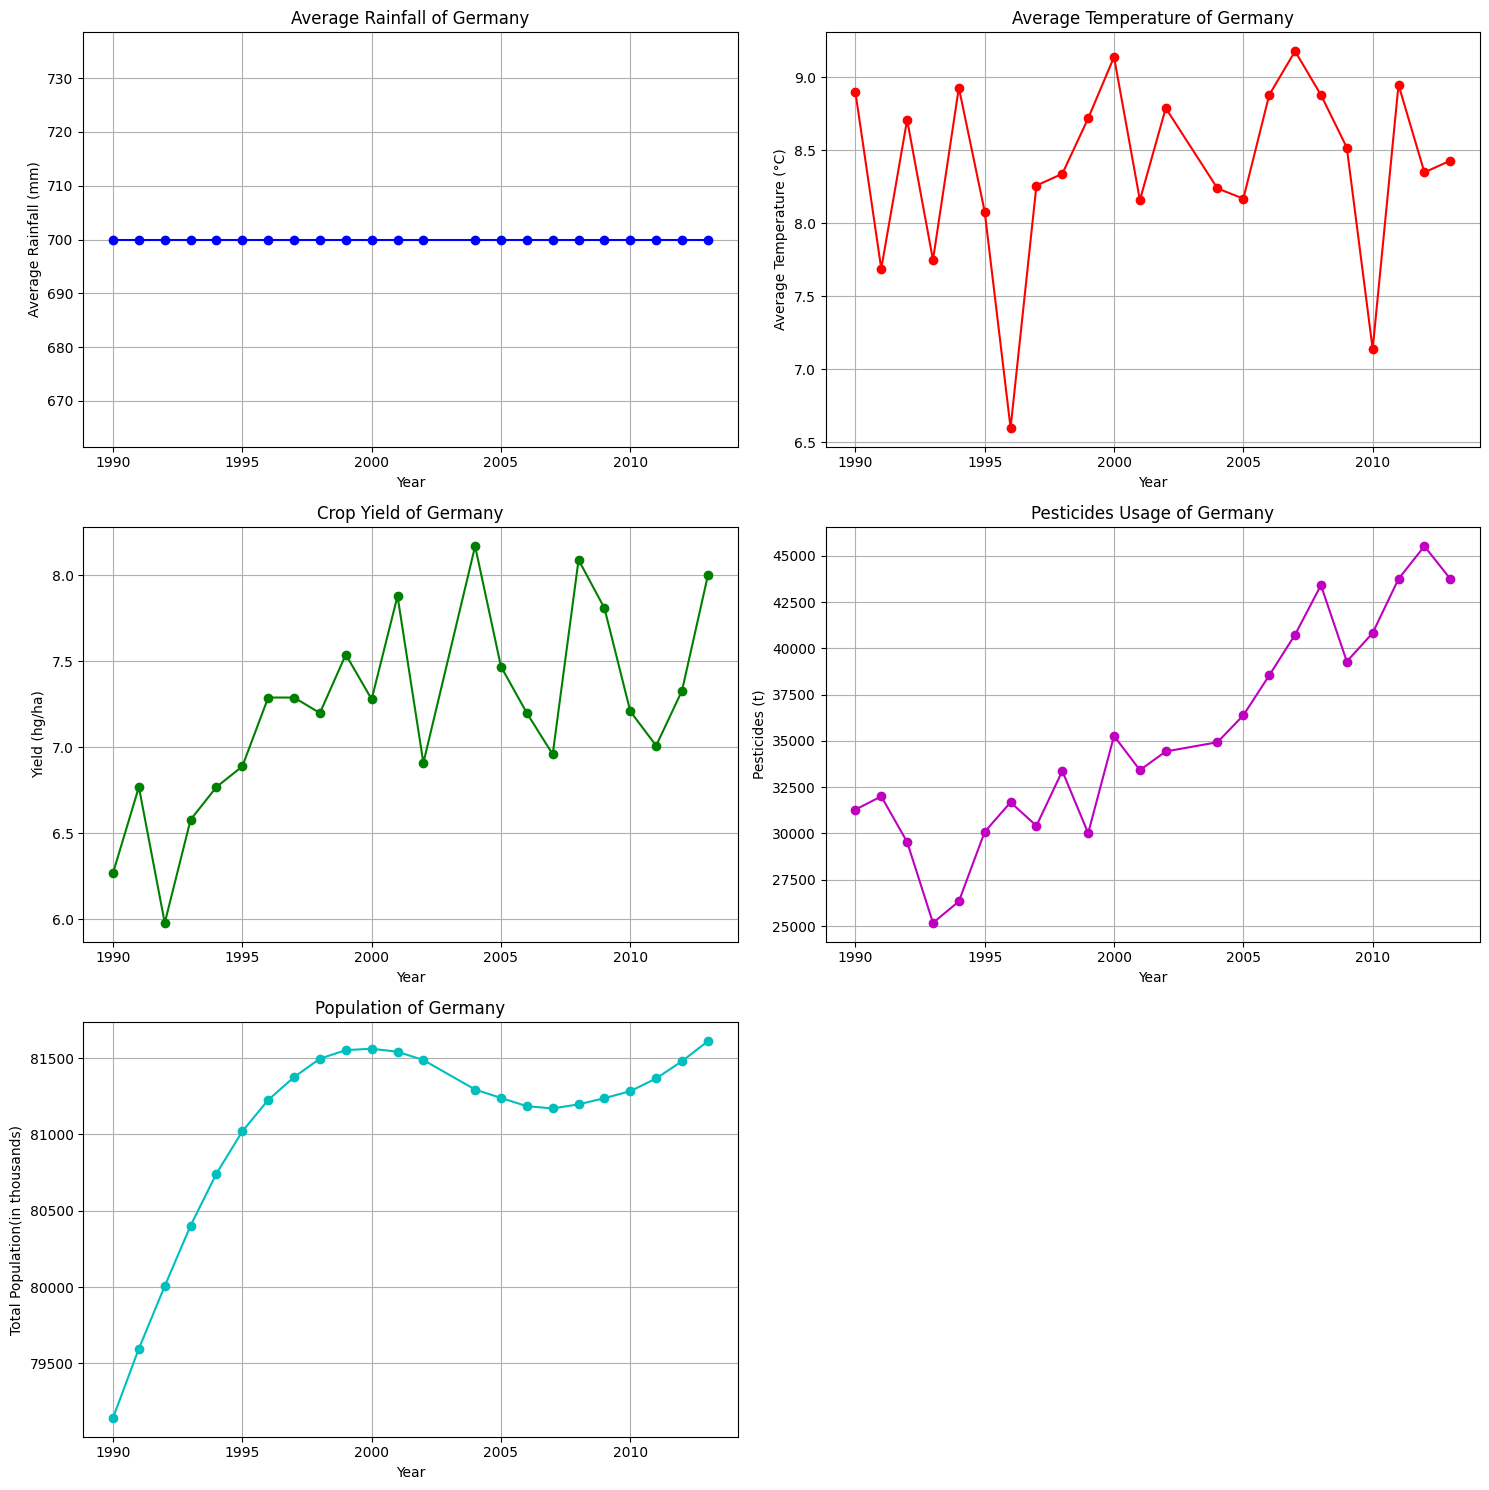

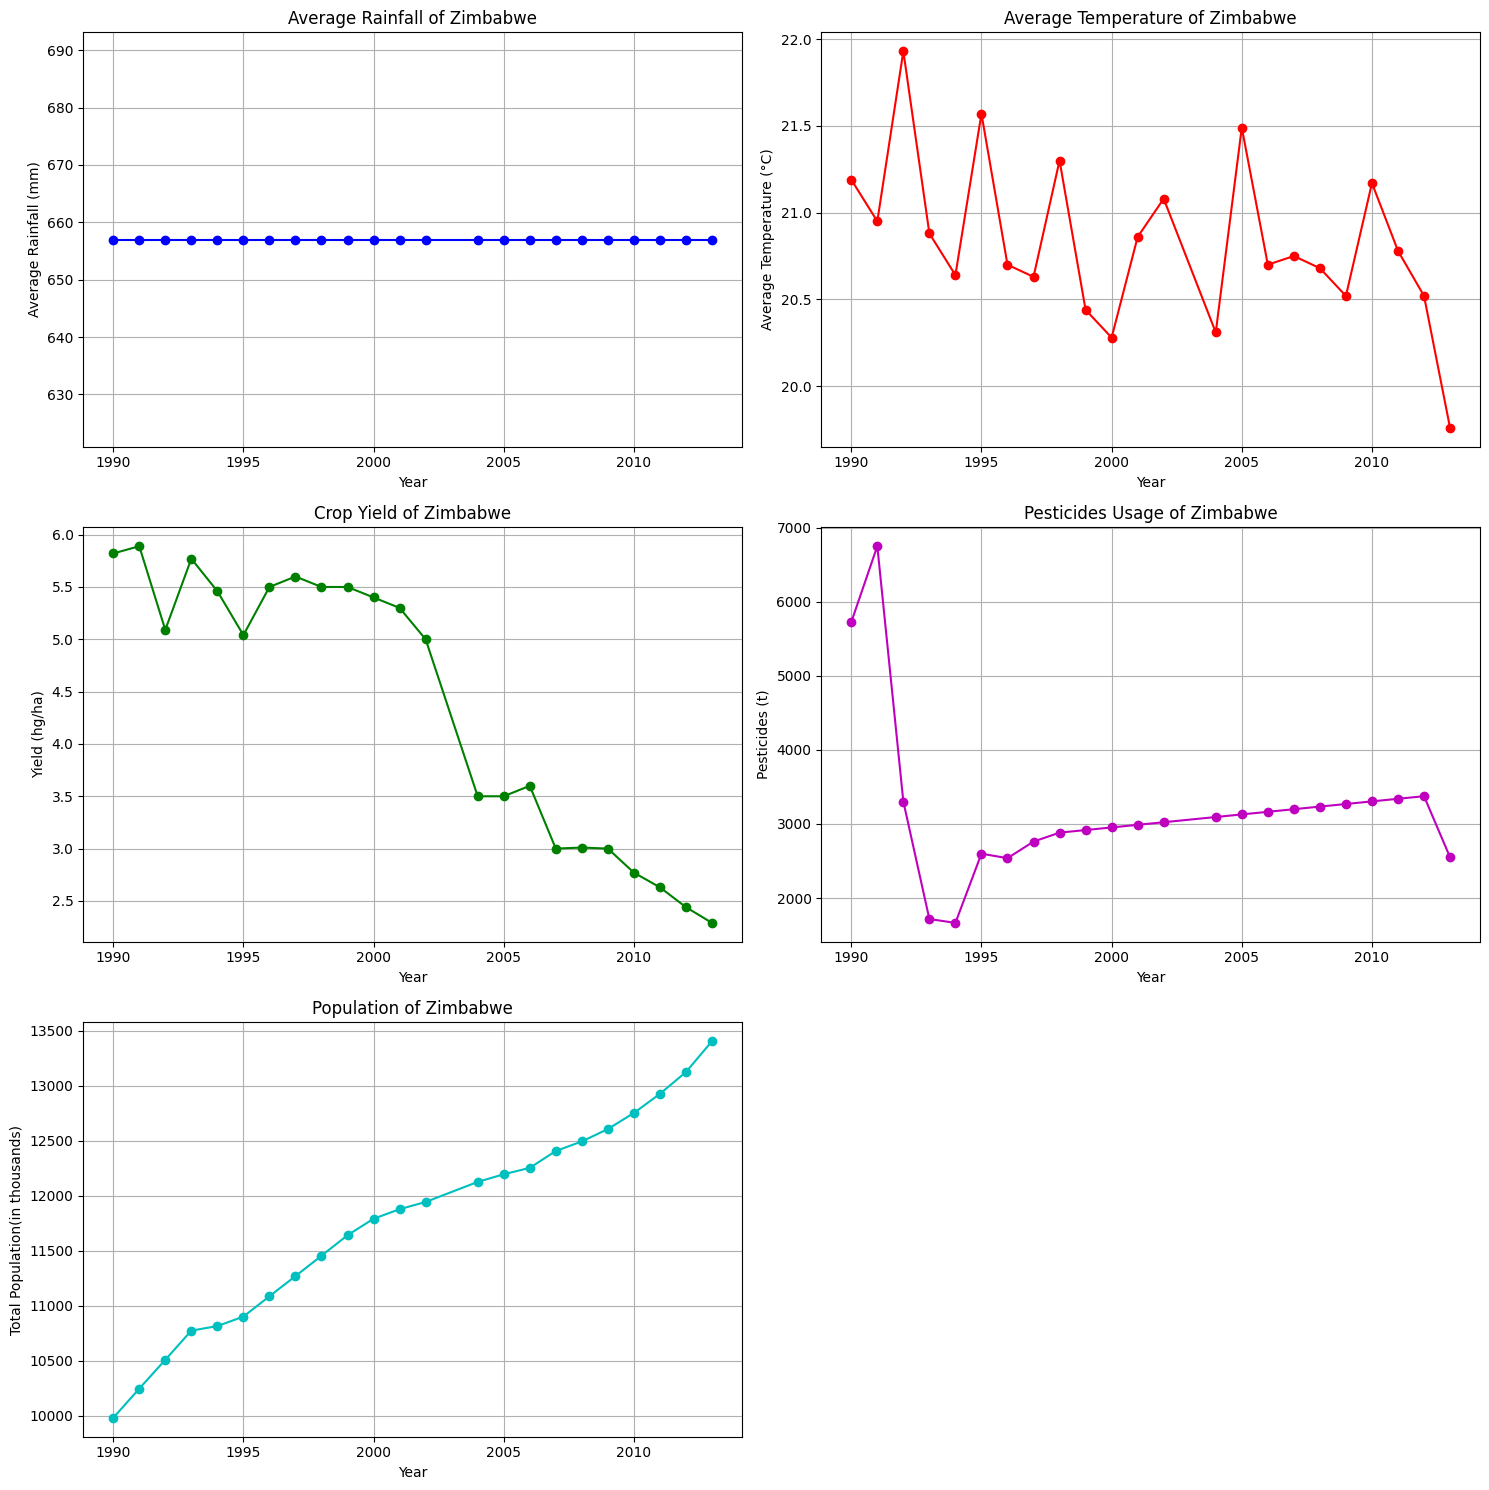

In [150]:
show_data_of_country(data, 'Belgium')
show_data_of_country(data, 'Germany')
show_data_of_country(data, 'Zimbabwe')

La funzione `show_data_of_country` prende come argomento il nome del paese che vogliamo esaminare e il frame contenente i dati. La funzione genera 4 grafici diversi, ognuno dei quali avente lungo l'asse x la lista degli anni per cui esistono osservazioni. Il primo grafico indica la quantità media di pioggia caduta negli anni, il secondo grafico indica la temperatura media negli anni, il terzo indica lo yield(raccolta) negli anni e l'ultimo indica l'utilizzo dei pesticidi(in tonnellate) negli anni.

Di sopra possiamo vedere i grafici relativi a 3 paesi: Germania, Belgio e Zimbabwe. Come possiamo notare, dai grafici risulta difficile trovare qualche correlazione tra le feature.

In [151]:
def show_global_data(data):
    years = data['Year'].unique()
    grouped_data = data.groupby('Year')
    global_rain = grouped_data['average_rain_fall_mm_per_year'].mean()
    global_pest = grouped_data['pesticides_in_t'].mean()
    global_temp = grouped_data['avg_temp'].mean()
    global_yield = grouped_data['yield_in_t/ha'].mean()
    global_population = grouped_data['Total population (k)'].sum()
    
    # Create a figure and axes with 3x2 subplots (the last subplot will be empty)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    
    # First subplot: Rainfall
    axes[0, 0].plot(years, global_rain, marker='o', linestyle='-', color='b')
    axes[0, 0].set_title("Global Average Rainfall")
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Average Rainfall (mm)')
    axes[0, 0].grid(True)

    # Second subplot: Temperature
    axes[0, 1].plot(years, global_temp, marker='o', linestyle='-', color='r')
    axes[0, 1].set_title("Global Average Temperature")
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Average Temperature (°C)')
    axes[0, 1].grid(True)

    # Third subplot: Yield
    axes[1, 0].plot(years, global_yield, marker='o', linestyle='-', color='g')
    axes[1, 0].set_title("Global Crop Yield")
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Yield (hg/ha)')
    axes[1, 0].grid(True)

    # Fourth subplot: Pesticides
    axes[1, 1].plot(years, global_pest, marker='o', linestyle='-', color='m')
    axes[1, 1].set_title("Global Pesticides Usage")
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Pesticides (t)')
    axes[1, 1].grid(True)

    # Fifth subplot: Population
    axes[2, 0].plot(years, global_population, marker='o', linestyle='-', color='c')
    axes[2, 0].set_title("Global Population")
    axes[2, 0].set_xlabel('Year')
    axes[2, 0].set_ylabel('Total Population')
    axes[2, 0].grid(True)
    
    # Remove the empty subplot (axes[2, 1])
    fig.delaxes(axes[2, 1])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

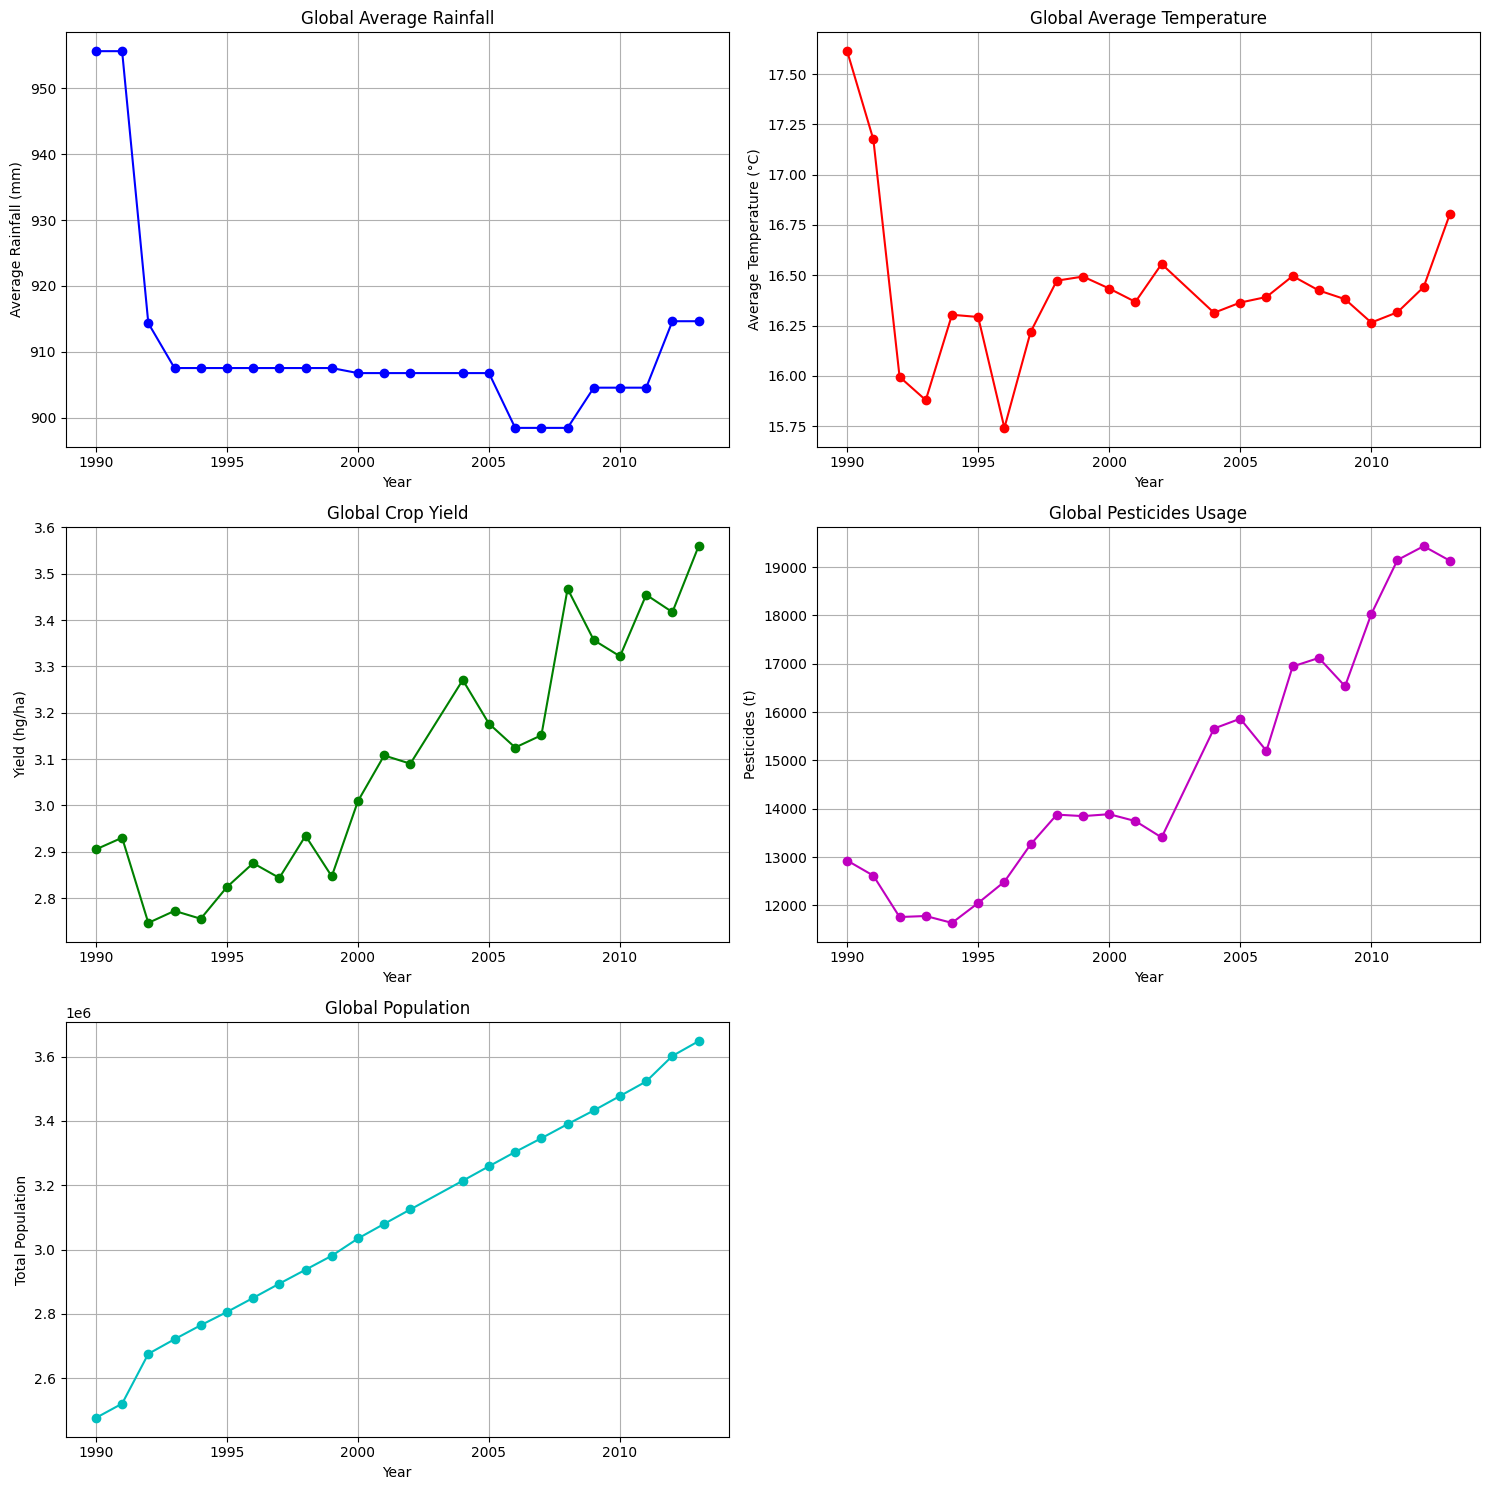

In [152]:
show_global_data(data)

Abbiamo definito anche un'altra funzione, chiamata `show_global_data`, la quale mostra le stesse informazioni di `show_data_of_country` però a scala globale. Osservando i grafici, in particolare il grafico dello yield e dei pesticidi, possiamo notare che sembra esserci una correlazione tra la produzione del grano e la quantità dei pesticidi utilizzati. Infatti, sembra che lo yield aumenti con l'aumentare dell' utilizzo dei pesticidi. Questo potrebbe essere dovuto al fatto che i pesticidi proteggono le piante di grano dagli agenti(insetti, malattie, etc...) che potrebbero ridurne il numero.
Inoltre, notiamo che c'è un'ulteriore correlazione tra lo yield e la popolazione mondiale. Questo fenomeno ha senso, visto che con l'aumentare della popolazione, aumenta anche la domanda e di conseguenza l'offerta di grano.

Text(0.5, 1.0, 'Correlation')

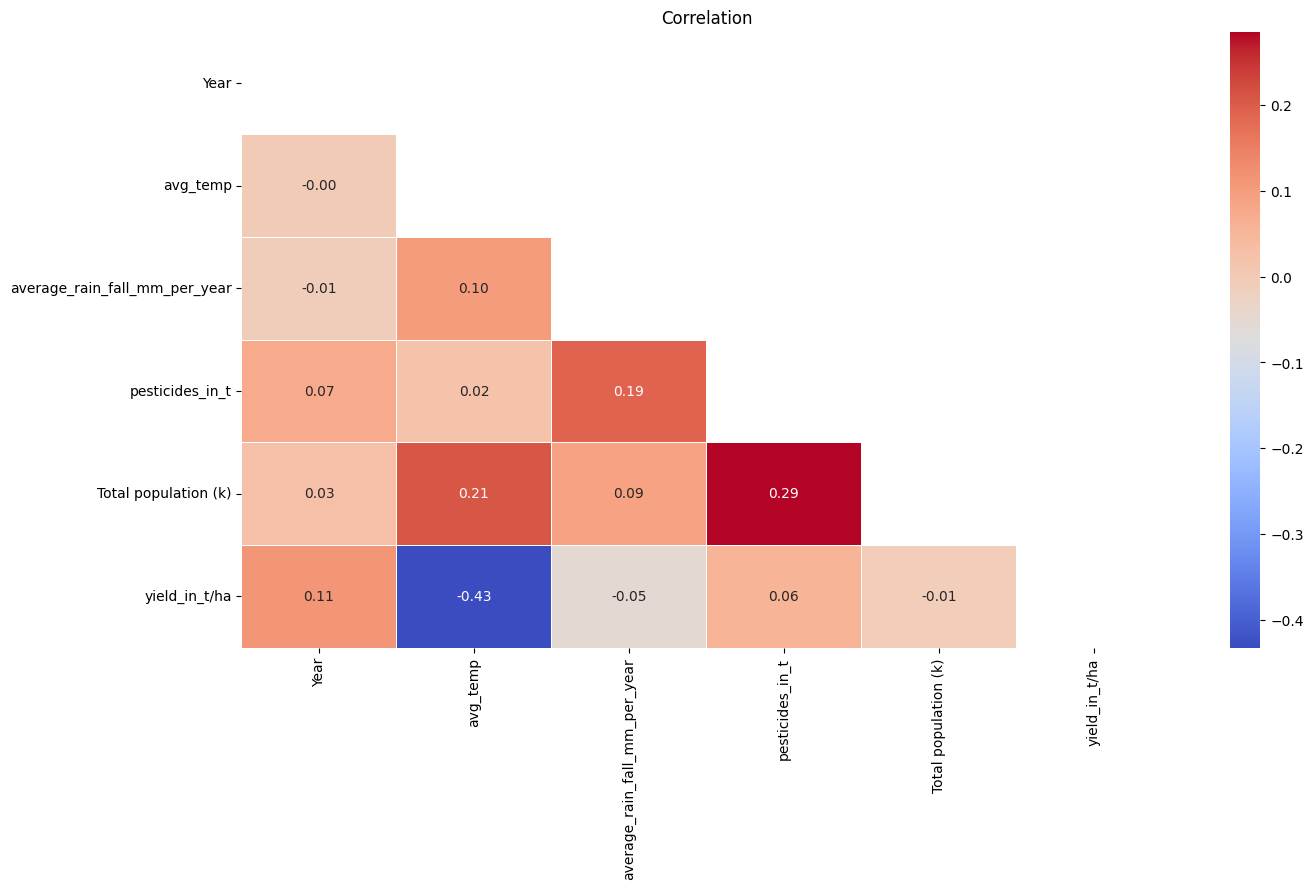

In [166]:
corr_matrix = data[['Year','avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_in_t', 'Total population (k)','yield_in_t/ha']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=ax)
ax.set_title('Correlation')

In [167]:
abs(data[['Year','avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_in_t', 'Total population (k)']].corrwith(data['yield_in_t/ha'])).sort_values(ascending=False)

avg_temp                         0.432377
Year                             0.112144
pesticides_in_t                  0.055337
average_rain_fall_mm_per_year    0.051986
Total population (k)             0.007975
dtype: float64

Un modo migliore per individuare  le relazioni tra le feature è tramite una `matrice di correlazione`. Come possiamo vedere le feature più influenti, anche se aventi comunque un indice di correlazione prossimo a 0, sono `avg_temp` e `Year`, mentre la `Total population` sembra essere quella meno influente.

# Preparazione dei dati

In [68]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [69]:
area_counts = data['Area'].value_counts().reset_index(name='Count')
area_counts.sort_values(by='Count')

,index,Count
80,Sudan,2
79,Montenegro,8
78,Belgium,13
77,Botswana,18
76,Eritrea,20
...,...,...
23,Sweden,23
22,Spain,23
21,South Africa,23
39,Austria,23


Lo stato del Sudan ha solo due istanze in tutto il dataset, questo può portare ad errori durante il training del modello predittivo, per questo motivo abbiamo deciso di toglierlo dal dataset.

In [70]:
data = data[data['Area'] != 'Sudan']

In [71]:
X = data.drop(columns=['yield_in_t/ha'])
y = data['yield_in_t/ha']

In [72]:
numerical_features = ['avg_temp', 'average_rain_fall_mm_per_year', 'pesticides_in_t', 'Total population (k)']
categorical_feature = ['Area']

In [73]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [74]:
def create_pipeline(model, polynomial_degree=None):
    column_transformer = ColumnTransformer(
        transformers = [
            ('num', ..., numerical_features),
            ('cat', OneHotEncoder(), categorical_feature)
        ],
        remainder = 'passthrough',
    )
    transformation = [('preprocessor', column_transformer)]

    if polynomial_degree is not None:
        polynomial_transformer = PolynomialFeatures(degree = polynomial_degree, include_bias = False),
        transformation.append(('poly', polynomial_transformer))

    transformation.append(('model', model))

    return Pipeline(steps = transformation)

In [75]:
def train_model(pipeline, X_train, y_train, grid = None):

    if grid is not None:
        kf = KFold(5, shuffle = True, random_state = 42)
        pipeline = GridSearchCV(pipeline, grid, cv = kf)
        pipeline.fit(X_train, y_train)
    return pipeline    

In [76]:
def print_eval(X, y, model):
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    re = mean_absolute_percentage_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"   Mean squared error: {mse:.5}")
    print(f"       Relative error: {re:.5%}")
    print(f"R-squared coefficient: {r2:.5}")

In [77]:
def eval_model(pipeline, X_train, X_test, y_train, y_test):
    
    print("Model performance on training data:")
    print_eval(X_train, y_train, pipeline)
    print("--------------------------------------------")
    print("Model performance on test data:")
    print_eval(X_test, y_test, pipeline)
    print("--------------------------------------------")
    #Se ho utilizzato GridSearchCV
    if isinstance(pipeline, GridSearchCV):
        print("Best parameters obtained from GridSearchCV:")
        print(pipeline.best_params_)
        print("--------------------------------------------")
    #print(get_feature_importance(pipeline, numeric_vars, categoric_vars, binary_vars))

In [78]:
def train_eval_model(X, y, model, polynomial_degree = None, grid = None):
    X_train, X_test, y_train, y_test = split_data(X, y)
    pipeline = create_pipeline(model, polynomial_degree)
    pipeline = train_model(pipeline, X_train, y_train, grid)

    eval_model(pipeline, X_train, X_test, y_train, y_test)

    return pipeline

# Modelli

In [79]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### 1. Linear Regression

In [90]:
model = LinearRegression()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__fit_intercept': [True, False],
}

%time lrp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.23221
       Relative error: 16.70460%
R-squared coefficient: 0.94687
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.22484
       Relative error: 16.13981%
R-squared coefficient: 0.94639
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__fit_intercept': True, 'preprocessor__cat__drop': None, 'preprocessor__cat__sparse_output': False, 'preprocessor__num': StandardScaler()}
--------------------------------------------
Wall time: 1.85 s


### 2. Ridge Regression

In [92]:
model = Ridge()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

%time rp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.23387
       Relative error: 16.91421%
R-squared coefficient: 0.94649
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.2265
       Relative error: 16.36011%
R-squared coefficient: 0.94599
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__alpha': 0.01, 'model__solver': 'lsqr', 'preprocessor__cat__drop': 'first', 'preprocessor__cat__sparse_output': False, 'preprocessor__num': MinMaxScaler()}
--------------------------------------------
Wall time: 3min 38s


### 3. Lasso

In [82]:
model = Lasso()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'model__max_iter': [2000, 5000, 10000],
    'model__tol': [0.0001, 0.001, 0.01]
}

%time lp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.24112
       Relative error: 17.78612%
R-squared coefficient: 0.94483
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.229
       Relative error: 17.18194%
R-squared coefficient: 0.94539
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__alpha': 0.001, 'model__max_iter': 2000, 'model__tol': 0.0001, 'preprocessor__cat__drop': None, 'preprocessor__cat__sparse_output': False, 'preprocessor__num': MinMaxScaler()}
--------------------------------------------
Wall time: 47.2 s


### 4. Elastic Net

In [83]:
model = ElasticNet()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'model__max_iter': [100, 500, 1000],
    'model__tol': [0.0001, 0.001, 0.01]
}

%time enp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.24634
       Relative error: 18.15650%
R-squared coefficient: 0.94363
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.23808
       Relative error: 17.60077%
R-squared coefficient: 0.94323
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__alpha': 0.001, 'model__max_iter': 100, 'model__tol': 0.0001, 'preprocessor__cat__drop': None, 'preprocessor__cat__sparse_output': True, 'preprocessor__num': MinMaxScaler()}
--------------------------------------------
Wall time: 46.4 s


### 5. Support Vector Regression 

In [ ]:
model = SVR()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__C': [0.1, 1, 10, 100],
    'model__epsilon': [0.1, 0.2, 0.5, 1.0],
}

%time train_eval_model(X, y, model, None, param_grid)

### 6. Decision Tree

In [84]:
model = DecisionTreeRegressor()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__criterion': ['mse', 'friedman_mse', 'mae'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': [None, 10, 20, 30],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

%time dtp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.0
       Relative error: 0.00000%
R-squared coefficient: 1.0
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.32017
       Relative error: 16.94594%
R-squared coefficient: 0.92365
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__criterion': 'friedman_mse', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__splitter': 'random', 'preprocessor__cat__drop': 'first', 'preprocessor__cat__sparse_output': False, 'preprocessor__num': 'passthrough'}
--------------------------------------------
Wall time: 44.4 s


### 7. Random Forest

In [ ]:
model = RandomForestRegressor()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__bootstrap': [True, False]
}

%time train_eval_model(X, y, model, None, param_grid)

### 8. Gradient Boosting Regression 

In [87]:
model = GradientBoostingRegressor()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5],
    'model__max_depth': [3, 5, 10],
}

%time gbp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.051335
       Relative error: 8.24856%
R-squared coefficient: 0.98825
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.20569
       Relative error: 14.32581%
R-squared coefficient: 0.95095
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__learning_rate': 0.5, 'model__max_depth': 3, 'model__n_estimators': 100, 'preprocessor__cat__drop': 'first', 'preprocessor__cat__sparse_output': False, 'preprocessor__num': StandardScaler()}
--------------------------------------------
Wall time: 29min 8s


### 9. Extreme Gradient Boosting

In [85]:
model = XGBRegressor()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1]
}

%time xgbp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.045801
       Relative error: 7.75247%
R-squared coefficient: 0.98952
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.20324
       Relative error: 13.89255%
R-squared coefficient: 0.95154
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300, 'preprocessor__cat__drop': 'first', 'preprocessor__cat__sparse_output': True, 'preprocessor__num': StandardScaler()}
--------------------------------------------
Wall time: 4min 58s


### 10. Catboost

In [88]:
model = CatBoostRegressor(verbose=False)

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__iterations': [100, 200, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__depth': [4, 6, 8],
}

%time cbp = train_eval_model(X, y, model, None, param_grid)

Model performance on training data:
   Mean squared error: 0.061398
       Relative error: 9.91079%
R-squared coefficient: 0.98595
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.16669
       Relative error: 13.57402%
R-squared coefficient: 0.96025
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__depth': 6, 'model__iterations': 500, 'model__learning_rate': 0.1, 'preprocessor__cat__drop': None, 'preprocessor__cat__sparse_output': True, 'preprocessor__num': StandardScaler()}
--------------------------------------------
Wall time: 18min 23s


### 11. K-Nearest Neighbors Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

param_grid = {
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), "passthrough"],
    'preprocessor__cat__drop': [None, "first"],
    'preprocessor__cat__sparse_output': [True, False],
    'model__n_neighbors': [3, 5, 10, 20],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}

%time knr = train_eval_model(X, y, model, None, param_grid)

  File "C:\Users\aless\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 268, in _count_physical_cores
    cpu_count_physical = sum(map(int, cpu_info))


Model performance on training data:
   Mean squared error: 0.0
       Relative error: 0.00000%
R-squared coefficient: 1.0
--------------------------------------------
Model performance on test data:
   Mean squared error: 0.4136
       Relative error: 18.76202%
R-squared coefficient: 0.90138
--------------------------------------------
Best parameters obtained from GridSearchCV:
{'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance', 'preprocessor__cat__drop': 'first', 'preprocessor__cat__sparse_output': True, 'preprocessor__num': StandardScaler()}
--------------------------------------------
Wall time: 15.8 s


# Conclusioni

Per questo progetto abbiamo deciso di prendere in considerazione alcuni valori che possono influenzare la quantità di grano prodotta; ovviamente la produzione di grano non dipende solo da questi fattori ma anche da fattori e eventi che non possono essere previsti (guerre, eventi naturali...).
Dopo uno studio inziale dei dataset abbiamo deciso di utilizzare diversi modelli per poi confrontarli tra di loro. Abbiamo utilizzato modelli più semplici come un modello di `Regressione lineare` fino a modelli più complessi come il `CatBoostRegressor` o l'`Extreme Gradient Boost`. Dopo aver allenato e valutato tutti i modelli, come ci aspettavamo, il modello di regressione lineare base non è ottimo, visto che soggetto ad overfitting, dato anche dalla complessita dei dati che prende in input per il training. Alcuni modelli più complessi funzionano come ci aspettavamo dando risultati molto vicini alla realtà. I modelli migliori sembrano essere il `CatBoostRegressor` e l'`Extreme Gradient Boost`.

Crediamo che nonostante la complessità dei dati e di quello che influenza la produzione nel mondo reale il risultato ottenuto sia buono e siamo quindi soddisfatti del nostro lavoro.

# Applicazione

In [97]:
import pickle
pickle.dump(xgbp, open('models/modelXGradientBoosting.pkl', 'wb'))

In [325]:
def predict(Year, Area, avg_temp, average_rain_fall_mm_per_year, pesticides_in_t, tot_population):
    data = {'Year':Year, 'Area':Area, 'avg_temp':avg_temp,
         'average_rain_fall_mm_per_year':average_rain_fall_mm_per_year, 'pesticides_in_t':pesticides_in_t,
         'Total population (k)':tot_population}
    y = pd.DataFrame(data = data, index = [0])
    preprocessor = cbp.best_estimator_.named_steps['preprocessor']
    model = cbp.best_estimator_.named_steps['model']

    # Transforma l'input
    transformed_y = preprocessor.transform(y)

    # Predici
    prediction = model.predict(transformed_y)
    return prediction

In [326]:
predict(1990,'Albania',16.37,1485.0,121.0,3290.062)

array([2.60558971])

In [85]:
X.head(1)

,Year,Area,avg_temp,average_rain_fall_mm_per_year,pesticides_in_t,Total population
0,1990,Albania,16.37,1485.0,121.0,3290.062
